In [1]:
from mpl_toolkits.basemap import Basemap
import netCDF4
from pylab import *
import numpy as np
import numpy.ma as ma
import matplotlib.pyplot as plt
from datetime import datetime
import math as math
%matplotlib inline

In [4]:
urlpath='http://mrtee.europa.renci.org:8080/thredds/dodsC/DataLayers/'
filen='JPL.ECCO2.SSH.1440x720.20140917.nc'
url=urlpath + filen
print url
nc=netCDF4.Dataset(url)
print nc.variables.keys()

http://mrtee.europa.renci.org:8080/thredds/dodsC/DataLayers/JPL.ECCO2.SSH.1440x720.20140917.nc
[u'TIME', u'LATITUDE_T', u'LONGITUDE_T', u'SSH']


In [49]:
lon=nc.variables['LONGITUDE_T'][:]
lon = lon - 180 
lat=nc.variables['LATITUDE_T'][:]
lon, lat=meshgrid(lon,lat)
Lo1=np.mean(lon)
La1=np.mean(lat)

ssh=nc.variables['SSH'][:]
ssh=np.squeeze(ssh)
print ssh.shape

i=np.size(lon,1)/2
s2 = ssh[:,0:i]
s1 = ssh[:,i:]

ssh2=np.column_stack((s1, s2))
print i,s2.shape, s1.shape,lon.shape, ssh2.shape

(720, 1440)
720 (720, 720) (720, 720) (720, 1440) (720, 1440)


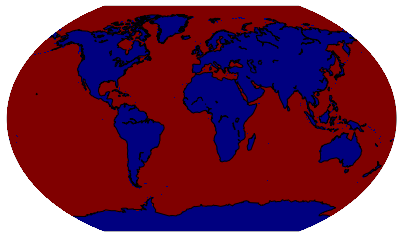

In [50]:
llcrnrlon=-180    # lower-left corner, lon
llcrnrlat= -90    # lower-left corner, lat
urcrnrlon= 180    # upper-right corner, lon
urcrnrlat=  90    # upper-right corner, lat
lon_0   =Lo1      # center of desired map domain (in degrees).
lat_1   =La1      # first standard parallel for lambert conformal
m = Basemap(projection='kav7',lon_0=Lo1,resolution='c')
fig = plt.figure()
ax = fig.add_axes([0.05,0.05,0.9,0.9])
m.drawmapboundary(fill_color='0.8')
m.drawcoastlines(linewidth=1.)
im1 = m.pcolormesh(lon,lat,ssh2,shading='flat',cmap=plt.cm.jet,latlon=True)

